# ***Hand Rolled Linear Regression***

by Peter Worth, pworth2022@fau.edu, some starter code from Deep Learning class with Oge Marques

Simple and Multiple Linear Regression Examples using both scalar and matrix form


# Part I: Simple Linear Regression (Production by Porosity+)


Following and/or constructed from the code and logic (and some text and supporting graphics), *Multiple Linear Rgerression and Visualization in Python* at https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python



## Data Load & Imports (Library Dependencies)

Mount google drive, requires permissions on my drive to load data set


In [1]:
pip install rfpimp

DEPRECATION: graphql-ws 0.3.0 has a non-standard dependency specifier graphql-core>=2.0<3. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of graphql-ws or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rfpimp

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [3]:
# if we are using Gogle Colab

"""
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/google_colab/computational_ai/linear_regression")
os.getcwd() 
"""

'\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\nos.chdir("/content/drive/MyDrive/google_colab/computational_ai/linear_regression")\nos.getcwd() \n'

In [4]:
df = pd.read_csv('./unconv_MV_v5.csv') 
df

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
...,...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,197,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,199,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149


**Description of headers**

Well : well index

Por : well average porosity (%)

Perm : permeability (mD)

AI : accoustic impedance (kg/m2s*10^6)

Brittle : brittleness ratio (%)

TOC : total organic carbon (%)

VR : vitrinite reflectance (%)

Prod : gas production per day (MCFD) - *Response Variable*

## Computing Feature Importance using RandomForestRegressor

In [5]:
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

In [6]:
######################################## Train/test split #########################################

df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']

In [7]:
################################################ Train #############################################

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [8]:
############################### Permutation feature importance #####################################

imp = rfpimp.importances(rf, X_test, y_test)

In [9]:
features

['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

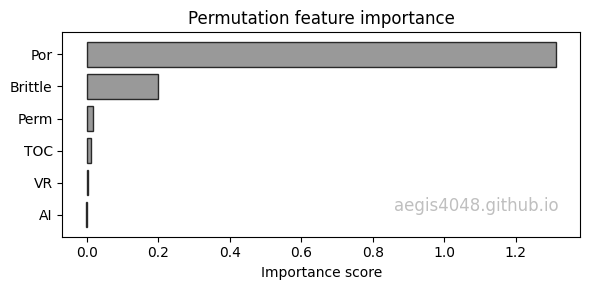

In [10]:
############################################## Plot ################################################

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

*We have six features (Por, Perm, AI, Brittle, TOC, VR) to predict the response variable (Prod).* 

*Based on the permutation feature importances shown in figure (1), Por is the most important feature, and Brittle is the second most important feature.*

## Prod by Perosity 1: using sklearn.linear_model.LinearRegression

In [11]:
model_X = df['Por'].values.reshape(-1,1)

X = df['Por'].values
y = df['Prod'].values

In [12]:
ols = linear_model.LinearRegression()

model = ols.fit(model_X, y)

response = model.predict(model_X)

In [13]:
model.fit_intercept

True

In [14]:
############################################## Evaluate ############################################

r2 = model.score(model_X, y)

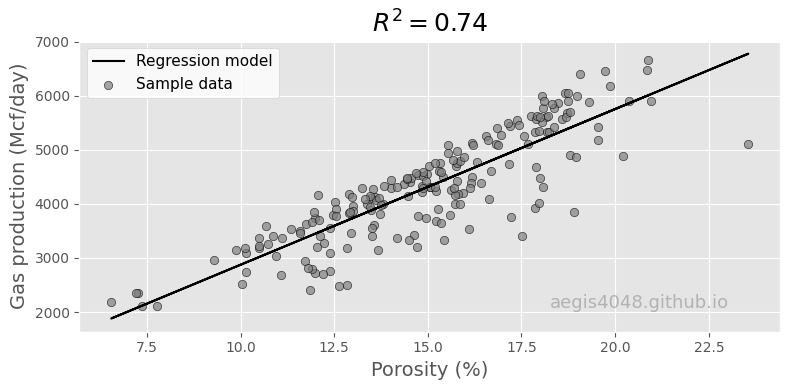

In [15]:
############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [16]:
# calcualte the slope (Beta1)
ols.coef_

array([287.78074285])

In [17]:
# calculate the intercept (Beta0)
ols.intercept_

-2.944431053714652

## Prod by Perosity 2: Manual Calculations

Formulas and text from *Linear Regression Derivation* by Ridely Lelsy, 2019 available at https://towardsdatascience.com/linear-regression-derivation-d362ea3884c2

### Coefficient Calculation Formula

#### Defining the Cost Function

![picture](https://drive.google.com/uc?export=view&id=1kJEmzbcC795kgwoWULRptvFs_ZF_KwS3)

#### Intercept Formula (beta0)

To minimize our cost function, S, we must find where the first derivative of S is equal to 0 with respect to **a** and **B**. The closer **a** and **B** are to 0, the less the total error for each point is. 

Let’s start with the partial derivative of a first.


![picture](https://drive.google.com/uc?export=view&id=1eCfHIbna6xqGaQNs9zdEbedFZTEWOccl)

#### beta1 formula

We’ve minimized the cost function of S with respect to **a**. Let’s find the last part which is S with respect to **B**.

![picture](https://drive.google.com/uc?export=view&id=10Shou-fBfJ71S8sSJALQip2SarsmUwNK)

Let’s substitute a (derived formula below) into the partial derivative of S with respect to **B** above. 

We’re doing this so we have a function of **a** and **B** in terms of only x and Y.

![picture](https://drive.google.com/uc?export=view&id=12n-LiIXZx7b6lfGutAicTJkbOjQXWpzz)


Let’s take -B out of the summation on the right so we can isolate the variable and rearrange terms remaining terms in the summation.

![picture](https://drive.google.com/uc?export=view&id=1dLMWGynHKF7nEFJA8Z8EV8snKcDoqaxM)

We have now isolated **B** and a in terms of x and Y.

#### Summary

If you have a dataset with one independent variable, you can find the line of best fit by calculating **B**

![picture](https://drive.google.com/uc?export=view&id=1_sK5NCVtPUu1z6M2DoUKuvotOkBr-3KY)


### Computing the Coefficients

#### Computing X and Y Means

\begin{align} \bar x&=\frac{\sum{x} }{n}\\ \end{align}
\begin{align} \bar y&=\frac{\sum{y} }{n}\\ \end{align}

In [18]:
#
# from https://www.geeksforgeeks.org/python-program-to-find-sum-of-array/
#

def _sum(arr):
 
    # initialize a variable
    # to store the sum
    # while iterating through
    # the array later
    sum = 0
 
    # iterate through the array
    # and add each element to the sum variable
    # one at a time
    for i in arr:
        sum = sum + i
 
    return(sum)

In [19]:
# variant of _sum to return mean

def _mean(arr):
 
    # initialize a variable
    # to store the sum
    # while iterating through
    # the array later
    sum = 0
 
    counter = 0
    
    # iterate through the array
    # and add each element to the sum variable
    # one at a time
    for i in arr:
        sum = sum + i
        counter += 1
 
    return(sum/counter)

In [20]:
mean_X = _mean(X)

In [21]:
mean_y = _mean(y)

#### Computing beta1 (slope)

In [22]:
# calculate the numerator

numerator = 0
counter = 0;

for i in X:
  numerator += (X[counter] * y[counter]) - (mean_y * X[counter])
  
  counter += 1

numerator

505558.83021771064

In [23]:
# calculating denominator

denominator = 0
counter = 0;

for i in X:
  denominator += (X[counter] ** 2) - (mean_X * X[counter])
  
  counter += 1

denominator

1756.7500354999916

In [24]:
beta1 = numerator / denominator

beta1

287.7807428498629

#### Computing beta0 (intercept)

In [25]:
beta0 = mean_y - (beta1 * mean_X)

beta0

-2.9444310537228375

### Computing R-squared (Coefficient of Determination)

Logic, info and formula from 

https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy)2.-,R%202%20%3D%201%20%E2%88%92%20sum%20squared%20regression%20(SSR)%20total,from%20the%20mean%20all%20squared.

The *coefficient of determination*, or *R-squared*, is a measure that provides information about the goodness of fit of a model. In the context of regression it is a statistical measure of how well the regression line approximates the actual data. It is therefore important when a statistical model is used either to predict future outcomes or in the testing of hypotheses. 

There are a number of variants (see comment below); the one presented here is widely used

\begin{align} R^2&=1-\frac{\text{sum squared regression (SSR)}}{\text{total sum of squares (SST)}},\\ &=1-\frac{\sum({y_i}-\hat{y_i})^2}{\sum(y_i-\bar{y})^2}. \end{align}

The *sum squared regression* (SSR) is the sum of the residuals squared. 

The *total sum of squares* (SST) is the sum of the distance the data is away from the mean all squared. 

#### Interpeting R-squared

As it is a percentage it will take values between 0 and 1.

![picture](https://drive.google.com/uc?export=view&id=1CWcQxgNmmBTVZDe83-1CRF7uSerWQ-3w)

#### Calculating Sum Squared Regression (SSR) 

To calculate SSR, find the residuals for each observation, square the value and then sum all of the values together. The *residual* for each observation is the difference between predicted values of *y* (dependent variable) and observed values of *y*.


\begin{align} \text{Residual}&=\text{actual } y \text{ value} - \text{predicted }y \text{ value} \text{,}\\ r_i&=y_i-\hat{y_i} . \end{align}

To find the residuals squared we need to square each of the residuals and sum them:

\begin{align} \sum({y_i}-\hat{y_i})^2&=\sum{r_i}\\ \end{align}

In [26]:
## reset for calculations
y_observed = y
y_predicted = response

counter = 0

"""
for obs_elems in y_observed:
  print("observed[" + str(counter) + "]: " + str(obs_elems))
  counter+=1
"""

'\nfor obs_elems in y_observed:\n  print("observed[" + str(counter) + "]: " + str(obs_elems))\n  counter+=1\n'

In [27]:
#residuals = DynamicArray()
  
ressie = 0
squared_ressie = 0
SSR = 0

# look through predicted and observed arrays
# calduate the residual,m square it
# and sum them all together

for i in range(0, y_observed.size):
  ressie = y_predicted[i] - y_observed[i]
  squared_ressie = pow(ressie, 2)
  SSR += squared_ressie
  
  # residuals.append(ressie)

print("Sum of Squared Regression: " + str(SSR))

Sum of Squared Regression: 50353807.04850733


#### Calculating Total Sum of Squares (SST)

The *total sum of squares* is the sum of the distance the (actual or observed) data is away from the mean (of all actual or observed data) all squared. 

\begin{align} \sum(y_i-\bar{y})^2\end{align}

The *mean* of all actual values is of course:

\begin{align} \bar{y}&=\frac{\sum{y} }{n}\\ \end{align}

In [28]:
sum = 0

for i in range(0, y_observed.size):
  sum += y_observed[i]
  
  
mean = sum / i

print("mean of observed values: " + str(mean))

mean of observed values: 4332.884273487438


In [29]:
mean_gap = 0
mean_gap_squared = 0
SST = 0

for i in range(0, y_observed.size):
  mean_gap = y_observed[i] - mean
  mean_gap_squared = pow(mean_gap, 2)
  SST += mean_gap_squared

print("Total Sum of Squares (SST): " + str(SST))

Total Sum of Squares (SST): 195937772.19350535


#### Final Calculation

Again, *R-Squared* formula is:

\begin{align} R^2&=1-\frac{\text{sum squared regression (SSR)}}{\text{total sum of squares (SST)}},\\ \end{align}

In [30]:
r_squared = 1 - (SSR/SST)

print("R-squared: " + str(r_squared))

R-squared: 0.7430112301227012


## Prod by Perosity 3: Matrix Form

Some formulas here and explanatotory text from lecture notes from Statistics 512: Applied Linear Models, Purdue University, Associate Professor Bo Li (https://www.stat.purdue.edu/~boli/), available online at https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf

Also leveraging *Matrix Formulation of the Multiple Regression Model*, from Penn State Eberly College of Science, STAT 462 | Applied Regression Analysis, available at https://online.stat.psu.edu/stat462/node/132/, which illustrates the relationship between the scaler and matrix model quite nicely, and whose calcualtions are (relatively) easy to follow.

### The Formulation from the Scalar Model

![picture](https://drive.google.com/uc?export=view&id=1SMEtnQLhU0IULfl0yVsodSkeIlk3jt1F)


***Or in a different form:***

![picture](https://drive.google.com/uc?export=view&id=1PlPfaEzJzlN16b8Q8iJVD9BR8nFs1Fwj)

**Where**

- ***X*** is called the design matrix, 
- β is the vector of parameters,
- E is the error vector, and
- ***Y*** is the response vector

### Solving for X*Beta 

**So we have**:

![picture](https://drive.google.com/uc?export=view&id=1VEva_Yb6pfuinqXvaS_Q-zKZubSb_iTJ)

Where in the 2D model, we have:

- X is an n × 2 matrix.
- Y is an n × 1 column vector, 
- β is a 2 × 1 column vector, and 
- ε is an n × 1 column vector.

*The matrix X and vector β are multiplied together using the techniques of matrix multiplication.*

*And, the vector Xβ is added to the vector ε using the techniques of matrix addition.*

### Prepping the numpy array

In [31]:
df

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
...,...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,197,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,199,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149


**Description of headers**

Well : well index

Por : well average porosity (%)

Perm : permeability (mD)

AI : accoustic impedance (kg/m2s*10^6)

Brittle : brittleness ratio (%)

TOC : total organic carbon (%)

VR : vitrinite reflectance (%)

Prod : gas production per day (MCFD) - *Response Variable*

In [32]:
numpy_data = df.to_numpy()

numpy_data

array([[ 1.00000000e+00,  1.20800000e+01,  2.92000000e+00, ...,
         1.16000000e+00,  2.31000000e+00,  4.16519619e+03],
       [ 2.00000000e+00,  1.23800000e+01,  3.53000000e+00, ...,
         8.90000000e-01,  1.88000000e+00,  3.56114621e+03],
       [ 3.00000000e+00,  1.40200000e+01,  2.59000000e+00, ...,
         8.90000000e-01,  2.72000000e+00,  4.28434857e+03],
       ...,
       [ 1.98000000e+02,  1.21200000e+01,  2.27000000e+00, ...,
        -4.00000000e-02,  1.73000000e+00,  3.40957536e+03],
       [ 1.99000000e+02,  1.55500000e+01,  4.48000000e+00, ...,
         1.89000000e+00,  2.35000000e+00,  5.08759215e+03],
       [ 2.00000000e+02,  2.08900000e+01,  7.54000000e+00, ...,
         1.71000000e+00,  2.27000000e+00,  6.66262238e+03]])

In [33]:
numpy_data.shape

(200, 8)

In [34]:
df.loc[0]

Well          1.000000
Por          12.080000
Perm          2.920000
AI            2.800000
Brittle      81.400000
TOC           1.160000
VR            2.310000
Prod       4165.196191
Name: 0, dtype: float64

In [35]:
numpy_data[0]

array([1.00000000e+00, 1.20800000e+01, 2.92000000e+00, 2.80000000e+00,
       8.14000000e+01, 1.16000000e+00, 2.31000000e+00, 4.16519619e+03])

In [36]:
df.head

<bound method NDFrame.head of      Well    Por  Perm    AI  Brittle   TOC    VR         Prod
0       1  12.08  2.92  2.80    81.40  1.16  2.31  4165.196191
1       2  12.38  3.53  3.22    46.17  0.89  1.88  3561.146205
2       3  14.02  2.59  4.01    72.80  0.89  2.72  4284.348574
3       4  17.67  6.75  2.63    39.81  1.08  1.88  5098.680869
4       5  17.52  4.57  3.18    10.94  1.51  1.90  3406.132832
..    ...    ...   ...   ...      ...   ...   ...          ...
195   196  11.95  3.13  2.97    67.18  0.80  2.06  3847.571003
196   197  17.99  9.87  3.38    44.32  0.98  2.08  5601.227131
197   198  12.12  2.27  3.52    57.07 -0.04  1.73  3409.575363
198   199  15.55  4.48  2.48    58.25  1.89  2.35  5087.592149
199   200  20.89  7.54  3.23    46.17  1.71  2.27  6662.622385

[200 rows x 8 columns]>

In [37]:
counter = 0

for x in numpy_data:

  if counter < 10:
    strx = str(x)
    print(str(counter) + ":" + strx)
  else:
    break

  counter+=1

0:[1.00000000e+00 1.20800000e+01 2.92000000e+00 2.80000000e+00
 8.14000000e+01 1.16000000e+00 2.31000000e+00 4.16519619e+03]
1:[2.00000000e+00 1.23800000e+01 3.53000000e+00 3.22000000e+00
 4.61700000e+01 8.90000000e-01 1.88000000e+00 3.56114621e+03]
2:[3.00000000e+00 1.40200000e+01 2.59000000e+00 4.01000000e+00
 7.28000000e+01 8.90000000e-01 2.72000000e+00 4.28434857e+03]
3:[4.00000000e+00 1.76700000e+01 6.75000000e+00 2.63000000e+00
 3.98100000e+01 1.08000000e+00 1.88000000e+00 5.09868087e+03]
4:[5.00000000e+00 1.75200000e+01 4.57000000e+00 3.18000000e+00
 1.09400000e+01 1.51000000e+00 1.90000000e+00 3.40613283e+03]
5:[6.00000000e+00 1.45300000e+01 4.81000000e+00 2.69000000e+00
 5.36000000e+01 9.40000000e-01 1.67000000e+00 4.39576326e+03]
6:[7.00000000e+00 1.34900000e+01 3.60000000e+00 2.93000000e+00
 6.37100000e+01 8.00000000e-01 1.85000000e+00 4.10440099e+03]
7:[8.0000000e+00 1.1580000e+01 3.0300000e+00 3.2500000e+00 5.3000000e+01
 6.9000000e-01 1.9300000e+00 3.4967427e+03]
8:[9.000

### Creating The Matrices (numpy arrays)

In [38]:
Y_matrix = numpy_data[ :,7]

print(Y_matrix)

[4165.196191 3561.146205 4284.348574 5098.680869 3406.132832 4395.763259
 4104.400989 3496.742701 4025.851153 4285.026122 4691.546305 5128.20297
 5113.940775 5546.431951 4323.568513 3539.984263 5425.900608 3796.037029
 4534.585915 3803.411386 5778.851488 4771.307836 2486.075498 2515.440716
 6046.257538 2351.289487 4971.979256 3999.613909 2760.485982 3825.661812
 5859.748328 3775.981178 3907.28923  4118.233273 3621.261108 2718.652945
 3608.47473  5249.625543 4239.53187  4471.241364 4363.202854 4495.004769
 3098.436639 2677.297348 5779.876876 3210.90138  2967.240201 2415.825125
 5563.040771 5337.145786 5670.537767 5899.353594 4601.071319 3741.129167
 5605.978153 4079.994302 3146.528143 3691.832452 3542.532883 3969.558019
 5851.024387 3733.769597 5620.911404 4319.662079 5620.445827 4431.905847
 3376.2837   3999.97933  4336.465709 3767.10242  3180.611366 4320.554389
 4220.557084 4087.529805 5321.469922 6053.071368 5446.810082 3190.699612
 4276.410007 5518.256409 4555.146788 4489.29306  431

In [39]:
X_matrix = numpy_data[ :, 1]        # get Perosity data, second column

print(X_matrix)

[12.08 12.38 14.02 17.67 17.52 14.53 13.49 11.58 12.52 13.25 15.04 16.19
 16.82 17.39 13.83 11.34 19.55 15.58 14.73 12.47 18.08 16.32 12.62 10.03
 18.66  7.27 15.78 15.73 12.38 12.89 18.48 14.74 12.55 13.58 11.76 11.98
 13.56 16.55 15.22 14.54 14.37 15.4  10.14 11.09 18.37 14.71  9.29 11.85
 18.59 18.18 18.72 20.96 15.31 11.98 18.16 13.61 13.67 15.21 16.1  13.
 18.32 14.96 18.21 15.07 17.75 15.77 14.19 13.8  14.84 12.54 10.13 14.17
 14.85 16.62 17.85 18.73 17.2  10.49 13.53 18.04 14.97 16.18 15.07 13.69
 10.15 13.45 15.94 14.88 11.12 13.5  13.72  7.38 20.21 10.69 15.75 17.96
 16.95 19.73 11.91 15.53 14.44 13.37 10.5  18.9  17.89 15.32 13.48 17.17
 20.86 15.19 14.95 12.1  18.24 19.86 19.54 18.37 12.89 15.2  12.23 17.88
 15.79 12.38 18.98 13.76 23.55 14.86 16.43 15.86 12.98 17.21 15.34 17.57
 10.74 18.79 12.83 15.35 14.88 14.69  7.77 15.87 18.75 15.63 18.06 12.05
 14.44 16.69 15.8  16.84 13.46 14.63 12.2  10.5  18.68 16.88 15.42 13.01
 17.92 15.97 13.32 18.1  16.21 18.   17.86 11.6  17.9

In [40]:
ones_vector = np.ones(len(numpy_data))

ones_vector

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [41]:
X_matrix.shape

(200,)

In [42]:
ones_vector.shape

(200,)

In [43]:
# instantiate design matrix
design_matrix = np.zeros( (len(X_matrix), 2))

In [44]:
design_matrix.shape

(200, 2)

In [45]:
design_matrix[:,0] = ones_vector      # column (0) = ones
design_matrix[:,1] = X_matrix         # column (1) = X

design_matrix

array([[ 1.  , 12.08],
       [ 1.  , 12.38],
       [ 1.  , 14.02],
       [ 1.  , 17.67],
       [ 1.  , 17.52],
       [ 1.  , 14.53],
       [ 1.  , 13.49],
       [ 1.  , 11.58],
       [ 1.  , 12.52],
       [ 1.  , 13.25],
       [ 1.  , 15.04],
       [ 1.  , 16.19],
       [ 1.  , 16.82],
       [ 1.  , 17.39],
       [ 1.  , 13.83],
       [ 1.  , 11.34],
       [ 1.  , 19.55],
       [ 1.  , 15.58],
       [ 1.  , 14.73],
       [ 1.  , 12.47],
       [ 1.  , 18.08],
       [ 1.  , 16.32],
       [ 1.  , 12.62],
       [ 1.  , 10.03],
       [ 1.  , 18.66],
       [ 1.  ,  7.27],
       [ 1.  , 15.78],
       [ 1.  , 15.73],
       [ 1.  , 12.38],
       [ 1.  , 12.89],
       [ 1.  , 18.48],
       [ 1.  , 14.74],
       [ 1.  , 12.55],
       [ 1.  , 13.58],
       [ 1.  , 11.76],
       [ 1.  , 11.98],
       [ 1.  , 13.56],
       [ 1.  , 16.55],
       [ 1.  , 15.22],
       [ 1.  , 14.54],
       [ 1.  , 14.37],
       [ 1.  , 15.4 ],
       [ 1.  , 10.14],
       [ 1.

### Calculating Least Squares Coefficients 

least squares estimates are obtained by the following matrix formula 

[see notes Lecture 2 and also https://online.stat.psu.edu/stat462/node/132/]

the (k+1) × 1 vector containing the estimates of the (k+1) parameters of the regression function can be shown to equal:

![picture](https://drive.google.com/uc?export=view&id=1fLw8q8_dK5Z9_tstAmUJkHAP9sz3Emps)

where:
- *(X'X)–1 is the inverse of the X'X matrix, and*
- *X' is the transpose of the X matrix.*

**AND furthermore, it can be shown that**

![picture](https://drive.google.com/uc?export=view&id=1K3NkOqKvendhfR_-faFT1N1Ea3HQbsUt)


In [46]:
transpose_design_matrix = design_matrix.T

#transpose_design_matrix

recall that ***X***, the design matrix, in a simple linear regression setting is

\begin{bmatrix} 1 & x_1\\  1 & x_2\\  \vdots & \vdots\\  1 & x_n \end{bmatrix}


and the ***X'X*** matrix in the simple linear regression setting must be:

![picture](https://drive.google.com/uc?export=view&id=1VxAXHsPBfz0WoOydU_Mp9zIJ7aPh-avz)


In [47]:
XT_dot_X = transpose_design_matrix.dot(design_matrix)

XT_dot_X

array([[  200.    ,  2998.23  ],
       [ 2998.23  , 46703.6657]])

and ***X'Y*** is equal to:

\begin{bmatrix} \sum_{i=1}^{n}y_i\\  \sum_{i=1}^{n}x_iy_i \end{bmatrix}

In [48]:
XT_dot_Y = transpose_design_matrix.dot(Y_matrix)

XT_dot_Y

array([  862243.970424  , 13431587.52743946])

In [49]:
XT_dot_X_inv = np.linalg.inv(XT_dot_X)

XT_dot_X_inv

array([[ 0.13292633, -0.00853346],
       [-0.00853346,  0.00056923]])

*and then we have:*

![picture](https://drive.google.com/uc?export=view&id=1KpdqqZ6r47jUo8ZvgAAhPbZxsc0UHiNn)

*And so we get:*

In [50]:
B = XT_dot_X_inv.dot(XT_dot_Y)

B

array([ -2.94443105, 287.78074285])

*where beta0 is B[0] and beta1 is B[1]...*

In [51]:
B[0]

-2.9444310538383434

In [52]:
B[1]

287.78074284986906

# Part II: Multiple Linear Regression 

![picture](https://drive.google.com/uc?export=view&id=1HS_WKI7C5x9RuNbbmiyCBgGHotNUmAqP)

***Function (scaler) form of (multi-variate) linear regression model:***

\begin{equation} y=\beta  _{0}+\beta _{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{3}+\epsilon.  \end{equation}

### sklearn.linear_model.LinearRegression() examples

#### 3D Example using Gas Production Data Set

##### Strong Corrleation Example (with visualization)

In [53]:
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

X = df[['Por', 'Brittle']].values.reshape(-1,2)
Y = df['Prod']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)

model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [54]:
################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [55]:
############################################## Evaluate ############################################

r2 = model.score(X, Y)

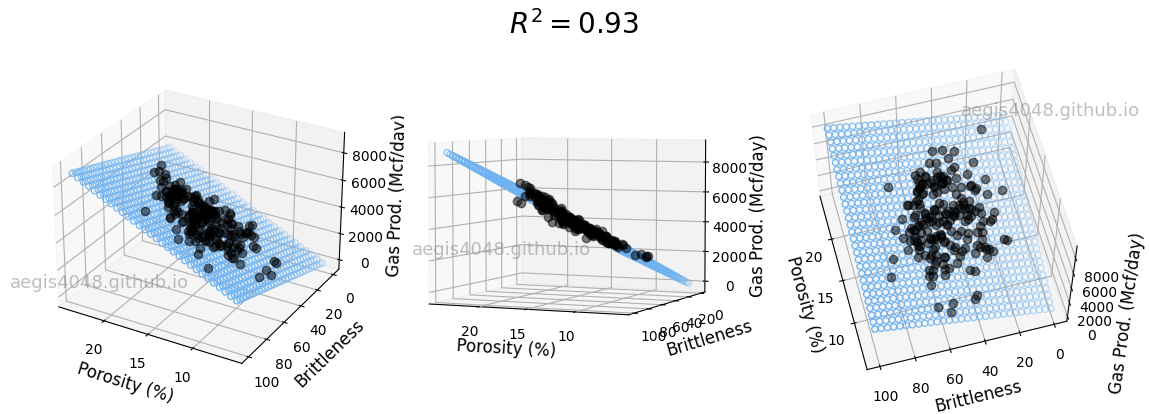

In [56]:
############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

With the help of the additional feature Brittle, the linear model experience significant gain in accuracy, now capturing 93% variability of data.

##### Weak Correlation Example (with visualization)

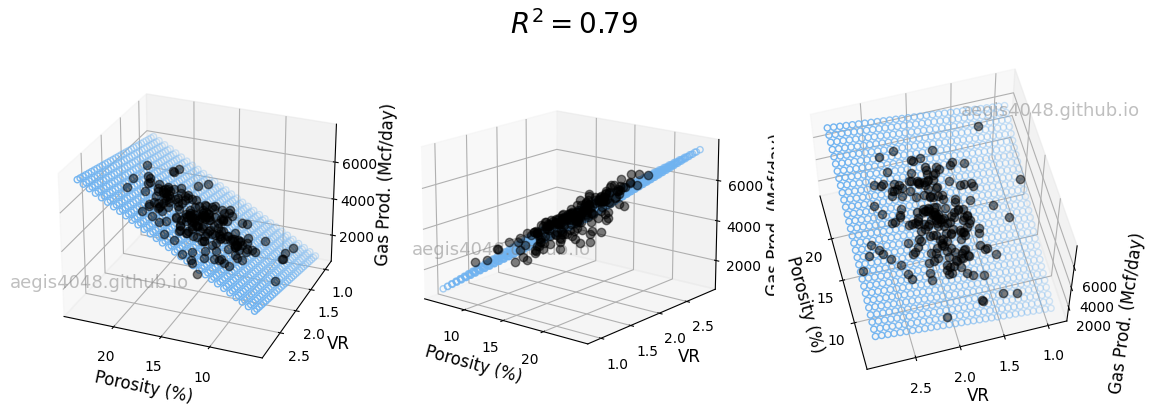

In [57]:
X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

#### Multi-Dimensional Example w/Boston Housing Data Set

##### **Sources**


*Simple and Multiple Linear Regression in Python* by Adi Bronshtein (2017), published in Towards Data Science (online), available at https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9



*Linear Regression in Python - Simple and Multiple Linear Regression* published by IntelliPaaT (online) available at https://intellipaat.com/blog/what-is-linear-regression/#Multiple-Linear-Regression-Model


M*ultiple Linear Regression Implementation in Python* by Harshita Yadav (2021), published Machine Learning with Python (online), available at https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjIwOWMwNTdkM2JkZDhjMDhmMmQ1NzM5Nzg4NjMyNjczZjdjNjI0MGYiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NjM4Njg0OTYsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNDEzODUwNDk2Njk3NDk2MDc4MCIsImhkIjoiZmF1LmVkdSIsImVtYWlsIjoicHdvcnRoMjAyMkBmYXUuZWR1IiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImF6cCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsIm5hbWUiOiJQZXRlciBXb3J0aCIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS0vQUNOUEV1OTI5YW5jWjhNNWd1MEEwSTlxSWRyRWlqM1lVZnBZbEN4S3UzX2g9czk2LWMiLCJnaXZlbl9uYW1lIjoiUGV0ZXIiLCJmYW1pbHlfbmFtZSI6IldvcnRoIiwiaWF0IjoxNjYzODY4Nzk2LCJleHAiOjE2NjM4NzIzOTYsImp0aSI6IjYzY2U4MjNkMzIxZTJlMjAzMDc3ZDc4MmMwNjI3M2FlZWQzZDM3OGQifQ.XA3mdUeBID1HwmjAQk2AbSKg1sHXFJLWpdZk8MwPmJ25A6elgd5QeGeG4odvk65djMkGcOYGRkiufTIlgQvU1rD3vZlXkA24LIh73gAzXZpf4AAy1wR4Obf-33YBfLXG-Rb9ALk--KFJvGZLVZaPNMtm9FefLfTObgrTYHoI8Zi4OGOOHwBErJ0VWnR-czoMlw4iXRkHdsfevTN7ooF0w7H7KHUdIFAujt37VaxUlrOqqSS0VdTDDuub5itx0F0ApXi7bLGvvGoa4bX8I_UADVx-y_shXtidFkZB0KHnTATUueh8xBYeKqef043St_swn47JGZ1of0K9T9iO9x3Aiw



##### Data Load and View

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   

 NB There are ethical problenms with this data set, so it is hard to come by. Downloaded from here: https://github.com/selva86/datasets/blob/master/BostonHousing.csv

In [58]:
# for Google Colab
"""
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/google_colab/computational_ai/linear_regression")
os.getcwd() 
"""

'\ndrive.mount(\'/content/drive\')\nos.chdir("/content/drive/MyDrive/google_colab/computational_ai/linear_regression")\nos.getcwd() \n'

In [59]:
raw_df = pd.read_csv('./BostonHousing.csv', header=0) 
raw_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [60]:
raw_df.shape

(506, 14)


***Variables in order***

 **[0]CRIM**     per capita crime rate by town
 
 **[1]ZN**       proportion of residential land zoned for lots over 25,000 sq.ft.
 
 **[2]INDUS**    proportion of non-retail business acres per town
 
 **[3]CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 **[4]NOX**      nitric oxides concentration (parts per 10 million)
 
 **[5]RM**       average number of rooms per dwelling
 
 **[6]AGE**      proportion of owner-occupied units built prior to 1940
 
 **[7]DIS**      weighted distances to five Boston employment centres
 
 **[8]RAD**      index of accessibility to radial highways
 
 **[9]TAX**      full-value property-tax rate per $10,000
 
 **[10]PTRATIO**  pupil-teacher ratio by town
 
 **[11]B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 **[12]LSTAT**    % lower status of the population
 
 **[13]MEDV**     Median value of owner-occupied homes in $1000's

In [61]:
Xdf = pd.DataFrame(raw_df.iloc[:,:-1])

In [62]:
Xdf

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


##### Building the Model

In [63]:
Xdf.shape

(506, 13)

In [64]:
ydf = pd.DataFrame(raw_df.iloc[:,-1])

In [65]:
ydf

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [66]:
ydf.shape

(506, 1)

In [67]:
lm = linear_model.LinearRegression()
model = lm.fit(Xdf,ydf)

In [68]:
predictions = lm.predict(Xdf)

In [69]:
predictions.shape

(506, 1)

##### Calculating R-squared and Coefficients

In [70]:
lm.score(Xdf,ydf)       # R-squared value

0.7406426641094094

In [71]:
lm.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [72]:
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

In [73]:
features

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat']

In [74]:
lm.intercept_

array([36.45948839])

## Matrix Form using Boston Housing Dataset

#### The Mathematical Model: Scaler to Matrix Formulations

Formulas and explanatotory text from lecture notes from Statistics 512: Applied Linear Models, Purdue University, Associate Professor Bo Li (https://www.stat.purdue.edu/~boli/), available online at https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf

#####**Scaler Form**

![picture](https://drive.google.com/uc?export=view&id=1uospvp7rc2x2APb5a7997SMiIrmqhuzV)

#####**Matrix Form**

![picture](https://drive.google.com/uc?export=view&id=1VZararHqXfoCMSPSFJ6H4zfeKDizN2m-)

#####**Coefficient Estimation Formula (using Least Squares)**

![picture](https://drive.google.com/uc?export=view&id=1_dAW96mREpmwKaTUu8ICkTCENOGr0o6y)


#####**Residuals**

![picture](https://drive.google.com/uc?export=view&id=1PiiHmTJMSr5xv37GrAE5hYG9IFZc6ONx)


### The Computation

#### Constructing the Matrices (numpy arrays)

In [75]:
numpy_data = raw_df.to_numpy()

numpy_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [76]:
numpy_data.shape

(506, 14)

In [77]:
raw_df.loc[0]

crim         0.00632
zn          18.00000
indus        2.31000
chas         0.00000
nox          0.53800
rm           6.57500
age         65.20000
dis          4.09000
rad          1.00000
tax        296.00000
ptratio     15.30000
b          396.90000
lstat        4.98000
medv        24.00000
Name: 0, dtype: float64

In [78]:
numpy_data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00, 2.400e+01])

In [79]:
#
# prints out first 10 values of numpy_data
#

"""
counter = 0

for x in numpy_data:

  if counter < 10:
    strx = str(x)
    print(str(counter) + ":" + strx)
  else:
    break

  counter+=1
"""

'\ncounter = 0\n\nfor x in numpy_data:\n\n  if counter < 10:\n    strx = str(x)\n    print(str(counter) + ":" + strx)\n  else:\n    break\n\n  counter+=1\n'

In [80]:
Y_matrix = numpy_data[:,-1]

print(Y_matrix)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [81]:
Y_matrix.shape

(506,)

In [82]:
ydf

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [83]:
X_matrix = numpy_data[:,:-1]  

print(X_matrix)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [84]:
X_matrix.shape

(506, 13)

In [85]:
Xdf

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [86]:
ones_vector = np.ones(len(numpy_data))

ones_vector

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [87]:
ones_vector.shape

(506,)

In [88]:
# instantiate design matrix
design_matrix = np.zeros( (len(X_matrix), 14))

In [89]:
design_matrix.shape

(506, 14)

In [90]:
design_matrix[:,0] = ones_vector                    # column (0) = ones

design_matrix.shape

(506, 14)

In [91]:
design_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [92]:
design_matrix[:,1:14] = X_matrix          

design_matrix

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [93]:
design_matrix.shape

(506, 14)

#### Calculating the Coefficient Estimates

least squares estimates are obtained by the following matrix formula 

[see notes Lecture 2 and also https://online.stat.psu.edu/stat462/node/132/]

the (k+1) × 1 vector containing the estimates of the (k+1) parameters of the regression function can be shown to equal:

![picture](https://drive.google.com/uc?export=view&id=1fLw8q8_dK5Z9_tstAmUJkHAP9sz3Emps)

where:
- *(X'X)–1 is the inverse of the X'X matrix, and*
- *X' is the transpose of the X matrix.*

**AND furthermore, it can be shown that**

![picture](https://drive.google.com/uc?export=view&id=1K3NkOqKvendhfR_-faFT1N1Ea3HQbsUt)


In [94]:
transpose_design_matrix = design_matrix.T

#transpose_design_matrix

recall that ***X***, the design matrix, in a simple linear regression setting is

\begin{bmatrix} 1 & x_1\\  1 & x_2\\  \vdots & \vdots\\  1 & x_n \end{bmatrix}


and the ***X'X*** matrix in the simple linear regression setting must be:

![picture](https://drive.google.com/uc?export=view&id=1VxAXHsPBfz0WoOydU_Mp9zIJ7aPh-avz)


In [95]:
XT_dot_X = transpose_design_matrix.dot(design_matrix)

XT_dot_X

array([[5.06000000e+02, 1.82844292e+03, 5.75000000e+03, 5.63521000e+03,
        3.50000000e+01, 2.80675700e+02, 3.18002500e+03, 3.46989000e+04,
        1.92029160e+03, 4.83200000e+03, 2.06568000e+05, 9.33850000e+03,
        1.80477060e+05, 6.40245000e+03],
       [1.82844292e+03, 4.39703436e+04, 4.68702660e+02, 3.24790952e+04,
        6.48084600e+01, 1.22612317e+03, 1.08219511e+04, 1.68514980e+05,
        3.46627456e+03, 4.11186651e+04, 1.17307321e+06, 3.64715518e+04,
        4.99455291e+05, 3.72684187e+04],
       [5.75000000e+03, 4.68702660e+02, 3.40029000e+05, 2.09030900e+04,
        2.70000000e+02, 2.48444175e+03, 3.87184670e+04, 2.05485400e+05,
        3.82992940e+04, 2.29180000e+04, 1.72295450e+06, 9.61321500e+04,
        2.23960499e+06, 3.80196800e+04],
       [5.63521000e+03, 3.24790952e+04, 2.09030900e+04, 8.65256299e+04,
        4.45170000e+02, 3.43239536e+03, 3.44618165e+04, 4.49313490e+05,
        1.62206733e+04, 7.17656500e+04, 2.72134904e+06, 1.06875320e+05,
        1.897

and ***X'Y*** is equal to:

\begin{bmatrix} \sum_{i=1}^{n}y_i\\  \sum_{i=1}^{n}x_iy_i \end{bmatrix}

In [96]:
XT_dot_Y = transpose_design_matrix.dot(Y_matrix)

XT_dot_Y

array([1.14016000e+04, 2.56871037e+04, 1.68607800e+05, 1.11564080e+05,
       9.95400000e+02, 6.09442791e+03, 7.39240776e+04, 7.32581140e+05,
       4.57138742e+04, 9.34451000e+04, 4.28779760e+06, 2.05316730e+05,
       4.20804951e+06, 1.19799159e+05])

In [97]:
XT_dot_X_inv = np.linalg.inv(XT_dot_X)

XT_dot_X_inv

array([[ 1.15665067e+00, -4.79507297e-04, -7.27912374e-05,
         7.81007312e-04, -5.30636011e-03, -4.72633728e-01,
        -6.72009691e-02,  2.52574657e-04, -1.60858766e-02,
         4.27955175e-03, -9.32179147e-05, -1.77832398e-02,
        -1.77463251e-04, -3.44062107e-03],
       [-4.79507297e-04,  4.79667291e-05, -1.74622146e-06,
         3.33058300e-06,  6.29163676e-05,  3.32353579e-04,
         1.60589501e-05, -6.44104667e-08,  3.40052584e-05,
        -2.58500572e-05,  6.50408184e-08,  3.99960618e-06,
         4.60269987e-07, -1.13029256e-05],
       [-7.27912374e-05, -1.74622146e-06,  8.36861245e-06,
         3.98676259e-06, -7.75453928e-06,  8.33368670e-05,
        -3.96939822e-05,  9.71684642e-07, -4.89624081e-05,
         4.27993705e-06, -5.11685476e-07,  2.48176992e-05,
        -1.86831132e-08, -1.64268535e-06],
       [ 7.81007312e-04,  3.33058300e-06,  3.98676259e-06,
         1.67943163e-04, -2.42364262e-04, -2.75364026e-03,
         1.04925166e-04, -3.97527513e-08,  1.

*and then we have:*

![picture](https://drive.google.com/uc?export=view&id=1KpdqqZ6r47jUo8ZvgAAhPbZxsc0UHiNn)

*And so we get:*

In [98]:
B = XT_dot_X_inv.dot(XT_dot_Y)

B

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

*where beta0 is B[0] and beta1 is B[1]...*

In [99]:
B[0]

36.4594883850732

In [100]:
B[1]

-0.10801135783679383